<a href="https://colab.research.google.com/github/Purnata26/NLP/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re                                  # library for regular expression operations
import string                              # for string operations
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random              
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer
tweet_train = pd.read_csv('/content/drive/MyDrive/NLP/all-data.csv', sep=',', encoding='latin-1',names = ["category","comment"])
print(tweet_train.info())
tweet_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4846 non-null   object
 1   comment   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


,category,comment
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [2]:
tweet_test = pd.read_csv('/content/drive/MyDrive/NLP/public-test-set.csv', sep=',', encoding='latin-1',names = ["category","comment"])
print(tweet_test.info())
tweet_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5118 non-null   object
 1   comment   5118 non-null   object
dtypes: object(2)
memory usage: 80.1+ KB
None


,category,comment
0,neutral,$AAL I do believe stimulus INCOMING!
1,positive,$XSPA $AAL
2,neutral,"$AAL ok, all in here, gut says stimulus is her..."
3,negative,$AAL Jeff Stein @JStein_WaPo Â· 43s Replying t...
4,negative,Wall Street retreats as Trump tests positive f...
...,...,...
5113,neutral,"$ZSAN z Bronstein, Gewirtz &amp; Grossman, LLC..."
5114,neutral,$ZSAN havent lost one ounce of sleep. =] if my...
5115,neutral,$ZSAN FAKE News Below
5116,negative,$ZSAN MM drones continue to harvest shares fro...


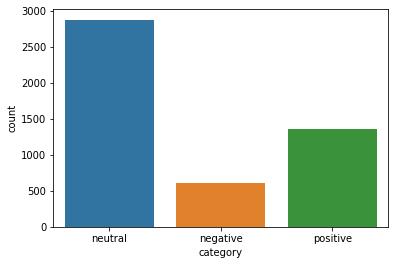

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='category',data=tweet_train)



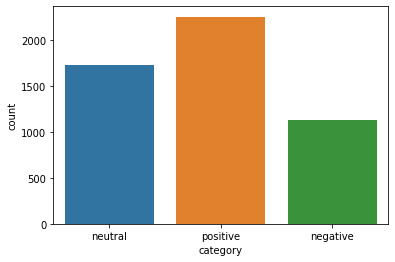

In [4]:
sns.countplot(x='category',data=tweet_test)

In [5]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
https://github.com/abdulfatir/twitter-sentiment-analysis/blob/master/code/preprocess.py

##Preprocess

In [ ]:
#for removing @,$ etc
def remove_pattern(tweet):
    tweet=tweet.lower()
    tweet_new=re.sub('(\$[\S]+)|(@[\S]+)', '', tweet)
    tweet_new = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet_new)
    return tweet_new
def remove_punc(tweet):
    tweet_new="".join([char for char in tweet if char not in string.punctuation])
    tweet_new=re.sub('[0-9]+', '', tweet_new)
    return tweet_new
def remove_freq(freq_word,tweet):
   return " ".join([word for word in str(tweet).split() if word not in freq_word])

def remove_stopwords(tweet):
    tweet_new=" ".join([word for word in tweet.split() if word not in stopword])
    tweet_new = re.sub(r'\s+', ' ', tweet_new)
    return tweet_new
def list_join_text(tweet):
  return ' '.join(tweet)
  
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet


In [ ]:
all_tweet=pd.concat([tweet_train,tweet_test],ignore_index=True)
all_tweet


,category,comment
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
9959,neutral,"$ZSAN z Bronstein, Gewirtz &amp; Grossman, LLC..."
9960,neutral,$ZSAN havent lost one ounce of sleep. =] if my...
9961,neutral,$ZSAN FAKE News Below
9962,negative,$ZSAN MM drones continue to harvest shares fro...


In [ ]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i,j in enumerate(x):
        ht = re.findall(r"#(\w+)", j)
        
        if ht!=[]:
          hashtags.append(ht)

    return hashtags


In [ ]:
HT_pos=hashtag_extract(all_tweet['comment'][all_tweet['category']=='positive'])
HT_neg=hashtag_extract(all_tweet['comment'][all_tweet['category']=='negative'])
HT_neu=hashtag_extract(all_tweet['comment'][all_tweet['category']=='neutral'])


In [ ]:
HT_pos = sum(HT_pos,[])
HT_neg = sum(HT_neg,[])
HT_neu=sum(HT_neu,[])

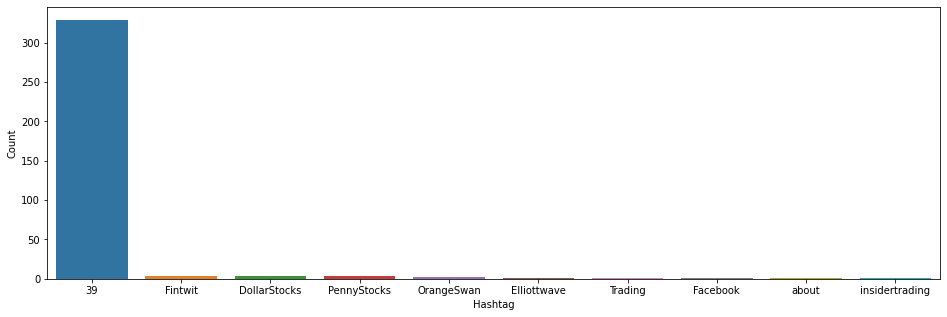

In [ ]:
a = nltk.FreqDist(HT_pos)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

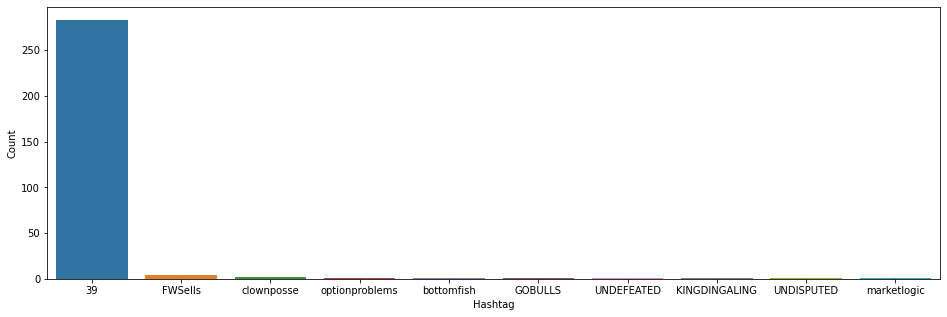

In [ ]:
a = nltk.FreqDist(HT_neg)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

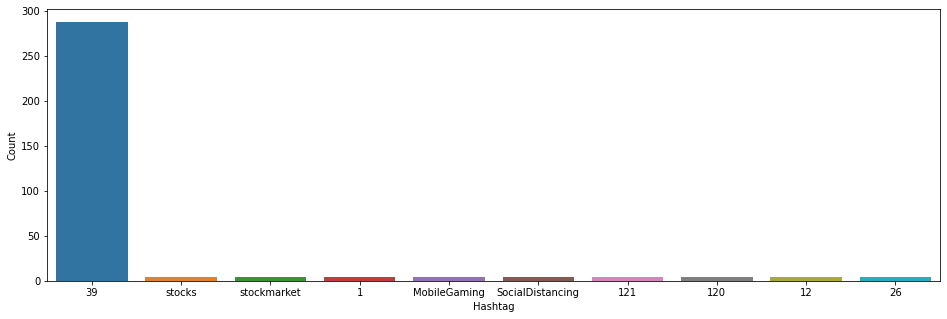

In [ ]:
a = nltk.FreqDist(HT_neu)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#preprocess
clear_comment=[]
for i,tweet in all_tweet.iterrows():
  clear_1=remove_pattern(all_tweet.loc[i,'comment'])
  clear_1=remove_punc(clear_1)
  clear_1=remove_stopwords(clear_1)
  clear_comment.append(clear_1)
all_tweet['clear tweet']=clear_comment
# remove special characters, numbers, punctuations
all_tweet['tidy_tweet'] = all_tweet['clear tweet'].str.replace("[^a-zA-Z#]", " ")
#removing short words length less than 3
all_tweet['tidy_tweet']=all_tweet['tidy_tweet'].apply(lambda x:list_join_text([word for word in x.split() if len(word)>3]))
all_tweet.drop(['clear tweet'],axis=1,inplace=True)

In [ ]:
#preprocess
clear_comment=[]
for i,tweet in test.iterrows():
  clear_1=remove_pattern(test.loc[i,'comment'])
  clear_1=remove_punc(clear_1)
  clear_1=remove_stopwords(clear_1)
  clear_comment.append(clear_1)
test['clear tweet']=clear_comment
# remove special characters, numbers, punctuations
test['tidy_tweet'] = test['clear tweet'].str.replace("[^a-zA-Z#]", " ")
#removing short words length less than 3
test['tidy_tweet']=test['tidy_tweet'].apply(lambda x:list_join_text([word for word in x.split() if len(word)>3]))
test.drop(['clear tweet'],axis=1,inplace=True)
test

,comment,tidy_tweet
0,$AAL I do believe stimulus INCOMING!,believe stimulus incoming
1,$XSPA $AAL,
2,"$AAL ok, all in here, gut says stimulus is her...",says stimulus hour nowjust feeling
3,$AAL Jeff Stein @JStein_WaPo Â· 43s Replying t...,jeff stein replying conservatives long called ...
4,Wall Street retreats as Trump tests positive f...,wall street retreats trump tests positive covid
...,...,...
5113,"$ZSAN z Bronstein, Gewirtz &amp; Grossman, LLC...",bronstein gewirtz grossman investigating poten...
5114,$ZSAN havent lost one ounce of sleep. =] if my...,havent lost ounce sleep money come soon enough...
5115,$ZSAN FAKE News Below,fake news
5116,$ZSAN MM drones continue to harvest shares fro...,drones continue harvest shares desperate sell ...


In [ ]:
all_tweet

,category,comment,tidy_tweet
0,neutral,"According to Gran , the company has no plans t...",according gran company plans move production r...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less squ...
2,negative,The international electronic industry company ...,international electronic industry company elco...
3,positive,With the new production plant the company woul...,production plant company would increase capaci...
4,positive,According to the company 's updated strategy f...,according company updated strategy years baswa...
...,...,...,...
9959,neutral,"$ZSAN z Bronstein, Gewirtz &amp; Grossman, LLC...",bronstein gewirtz grossman investigating poten...
9960,neutral,$ZSAN havent lost one ounce of sleep. =] if my...,havent lost ounce sleep money come soon enough...
9961,neutral,$ZSAN FAKE News Below,fake news
9962,negative,$ZSAN MM drones continue to harvest shares fro...,drones continue harvest shares desperate sell ...


Tokenizing and Stemming

In [ ]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
tokenized=[]
for i,row in all_tweet.iterrows():
  tokenized.append(tokenizer.tokenize(all_tweet.loc[i,'tidy_tweet']))
all_tweet['tokenized']=tokenized
all_tweet.drop(['comment','tidy_tweet'],axis=1,inplace=True)
all_tweet

,category,tokenized
0,neutral,"[according, gran, company, plans, move, produc..."
1,neutral,"[technopolis, plans, develop, stages, area, le..."
2,negative,"[international, electronic, industry, company,..."
3,positive,"[production, plant, company, would, increase, ..."
4,positive,"[according, company, updated, strategy, years,..."
...,...,...
9959,neutral,"[bronstein, gewirtz, grossman, investigating, ..."
9960,neutral,"[havent, lost, ounce, sleep, money, come, soon..."
9961,neutral,"[fake, news]"
9962,negative,"[drones, continue, harvest, shares, desperate,..."


In [ ]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
tokenized=[]
for i,row in test.iterrows():
  tokenized.append(tokenizer.tokenize(test.loc[i,'tidy_tweet']))
test['tokenized']=tokenized
test.drop(['comment','tidy_tweet'],axis=1,inplace=True)
test

,tokenized
0,"[believe, stimulus, incoming]"
1,[]
2,"[says, stimulus, hour, nowjust, feeling]"
3,"[jeff, stein, replying, conservatives, long, c..."
4,"[wall, street, retreats, trump, tests, positiv..."
...,...
5113,"[bronstein, gewirtz, grossman, investigating, ..."
5114,"[havent, lost, ounce, sleep, money, come, soon..."
5115,"[fake, news]"
5116,"[drones, continue, harvest, shares, desperate,..."


In [ ]:
#stemming
stemmer=PorterStemmer()
all_tweet['stemmed']=all_tweet['tokenized'].apply(lambda x: list_join_text([stemmer.stem(i) for i in x]))
all_tweet.drop(['tokenized'],axis=1,inplace=True)
all_tweet

,category,stemmed
0,neutral,accord gran compani plan move product russia a...
1,neutral,technopoli plan develop stage area less squar ...
2,negative,intern electron industri compani elcoteq laid ...
3,positive,product plant compani would increas capac meet...
4,positive,accord compani updat strategi year baswar targ...
...,...,...
9959,neutral,bronstein gewirtz grossman investig potenti cl...
9960,neutral,havent lost ounc sleep money come soon enough ...
9961,neutral,fake news
9962,negative,drone continu harvest share desper sell close ...


In [ ]:
#stemming
stemmer=PorterStemmer()
test['stemmed']=test['tokenized'].apply(lambda x: list_join_text([stemmer.stem(i) for i in x]))
test.drop(['tokenized'],axis=1,inplace=True)
test

,stemmed
0,believ stimulu incom
1,
2,say stimulu hour nowjust feel
3,jeff stein repli conserv long call mnuchin quo...
4,wall street retreat trump test posit covid
...,...
5113,bronstein gewirtz grossman investig potenti cl...
5114,havent lost ounc sleep money come soon enough ...
5115,fake news
5116,drone continu harvest share desper sell close ...


In [ ]:

#lemmantize
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
def lemmatize_words(text, lemmatizer, wordnet_map ):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
all_tweet['lemmatized']=all_tweet["stemmed"].apply(lambda text: lemmatize_words(text, lemmatizer, wordnet_map))
all_tweet.drop(['stemmed'],axis=1,inplace=True)
all_tweet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,category,lemmatized
0,neutral,accord gran compani plan move product russia a...
1,neutral,technopoli plan develop stage area less squar ...
2,negative,intern electron industri compani elcoteq lay t...
3,positive,product plant compani would increas capac meet...
4,positive,accord compani updat strategi year baswar targ...
...,...,...
9959,neutral,bronstein gewirtz grossman investig potenti cl...
9960,neutral,havent lose ounc sleep money come soon enough ...
9961,neutral,fake news
9962,negative,drone continu harvest share desper sell close ...


In [ ]:

#lemmantize
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
def lemmatize_words(text, lemmatizer, wordnet_map ):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
test['lemmatized']=test["stemmed"].apply(lambda text: lemmatize_words(text, lemmatizer, wordnet_map))
test.drop(['stemmed'],axis=1,inplace=True)
test

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,lemmatized
0,believ stimulu incom
1,
2,say stimulu hour nowjust feel
3,jeff stein repli conserv long call mnuchin quo...
4,wall street retreat trump test posit covid
...,...
5113,bronstein gewirtz grossman investig potenti cl...
5114,havent lose ounc sleep money come soon enough ...
5115,fake news
5116,drone continu harvest share desper sell close ...


In [ ]:
#remove_frequent_word
from collections import Counter
count=Counter()
for tweet in all_tweet['lemmatized']:
  words=tweet.split()
  for word in words:
    count[word]+=1
Freq_words=[i for (i,j) in count.most_common(10)]
all_tweet['lemmatized']=all_tweet['lemmatized'].apply(lambda x: remove_freq(Freq_words,x))

In [ ]:
all_tweet

,category,lemmatized
0,neutral,accord gran plan move product russia although ...
1,neutral,technopoli plan develop stage area less squar ...
2,negative,intern electron industri elcoteq lay ten emplo...
3,positive,product plant would increas capac meet expect ...
4,positive,accord updat strategi year baswar target longt...
...,...,...
9959,neutral,bronstein gewirtz grossman investig potenti cl...
9960,neutral,havent lose ounc sleep money come soon enough ...
9961,neutral,fake news
9962,negative,drone continu harvest desper sell close bottom


Plotting Most common word

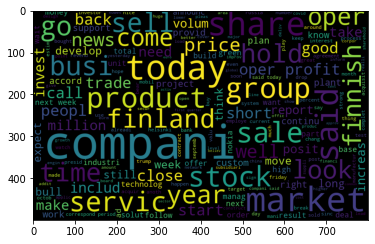

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
words=list_join_text([i for i in all_tweet['stemmed']])
cloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.imshow(cloud)

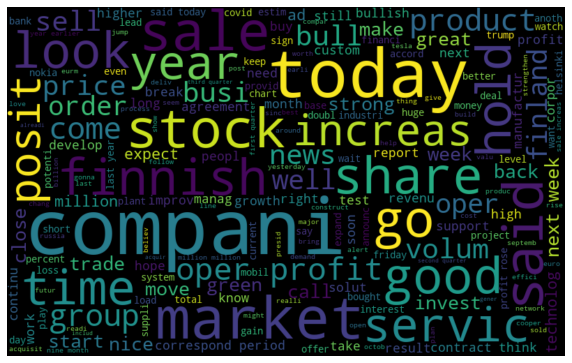

In [ ]:
negative_words = ' '.join([text for text in all_tweet['stemmed'][all_tweet['category'] == 'positive']])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


neutral==1
pos==2
neg==0

In [ ]:
from sklearn.preprocessing import LabelEncoder
all_tweet['label']=LabelEncoder().fit_transform(all_tweet['category'])
all_tweet.drop(['category'],axis=1,inplace=True)
all_tweet

,lemmatized,label
0,accord gran plan move product russia although ...,1
1,technopoli plan develop stage area less squar ...,1
2,intern electron industri elcoteq lay ten emplo...,0
3,product plant would increas capac meet expect ...,2
4,accord updat strategi year baswar target longt...,2
...,...,...
9959,bronstein gewirtz grossman investig potenti cl...,1
9960,havent lose ounc sleep money come soon enough ...,1
9961,fake news,1
9962,drone continu harvest desper sell close bottom,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

x_train,x_test,y_train,y_test = train_test_split(all_tweet.lemmatized,all_tweet.label,test_size = 0.1 , random_state = 0)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression(max_iter=10000))])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("DECISION TREE")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

DECISION TREE
accuracy: 63.79%
[[ 71  61  53]
 [ 16 353  79]
 [ 14 138 212]]
              precision    recall  f1-score   support

           0       0.70      0.38      0.50       185
           1       0.64      0.79      0.71       448
           2       0.62      0.58      0.60       364

    accuracy                           0.64       997
   macro avg       0.65      0.58      0.60       997
weighted avg       0.64      0.64      0.63       997

